# 데이터 분석을 통한 축구 경기 결과 예측

1. 홍성훈 (19941105)
2. ghdtjdgns02@naver.com
3. 홍성훈(19941105)/허재원(19950423)

- - -
 

# STEP 1. 서론
재원이는 축구를 좋아한다. 평소에도 FIFA 게임을 즐기고 있으며, 최근 개최된 2018 러시아 월드컵에도 큰 관심을 가지고 관람했다.  
뿐만 아니라 해외축구까지도 섭렵하며 유러피안 리그도 그의 큰 관심사 중 하나이다.  
평소 축구는 좋아하지만 베팅에는 큰 관심이 없던 재원이도 이번 월드컵에서 배당률이 5000 이상 뛰는 걸 보고 호기심이 생겼다.  
베팅 사이트를 들어가보니 각 경기마다 배당률이 매겨지는데, 많은 축구 팬들이 베팅을 했기 때문인지 배당률만 봐도 어느정도 판세가 보임을 알 수 있었다.  
그래서 굳이 베팅을 하지는 않더라도, 미리 경기의 결과를 예측함에 있어서 의미있는 요인이라는 생각이 들었다.  
하지만 단순히 배당률만 보고 그대로 따라간다면 예측의 의미가 있을까?   
그래서 문득 데이터 분석을 배운 김에 **승부 예측을 향상시킬 방법**을 찾아보기로 결심했다!  

여러 리그 중에서 EPL(English Premier Leagus, 잉글리시 프리미어 리그)를 분석해보도록 하자.

## 데이터 설명

분석에는 football-data.co.uk에서 제공하는 'The Premier League' 의 1516, 1617, 1718 시즌 데이터를 이용하였다. 
 
- 데이터 출처 : football-data.co.uk (http://www.football-data.co.uk/mmz4281/1718/E0.csv) - 1718 시즌에 치뤄진 프리미어 리그의 모든 매치 데이터와 북메이커의 배당률 데이터. (1516, 1617 시즌 동일 형태)

- 한 시즌에 380경기가 기록되어있다.

### 주요 변수 설명
- Date = Match Date (dd/mm/yy)
- HomeTeam = 홈팀명
- AwayTeam = 어웨이팀명
- FTHG = 전체 경기 중 홈 팀의 골 수
- FTAG = 전체 경기 중 어웨이 팀의 골 수
- FTR = 경기 결과 (H=Home Win, D=Draw, A=Away Win)
- HTHG = 전반전 중 홈 팀의 골 수
- HTAG = 전반전 중 어웨이 팀의 골 수
- HS = 홈 팀의 슈팅 수
- AS = 어웨이 팀의 슈팅 수
- HST = 홈 팀의 유효슈팅 수
- AST = 어웨이 팀의 유효슈팅 수
- HC = 홈 팀의 코너킥 수
- AC = 어웨이 팀의 코너킥 수
- HF = 홈 팀의 파울 수
- AF = 어웨이 팀의 파울 수
- HY = 홈 팀의 옐로카드 수
- AY = 어웨이 팀의 옐로카드 수
- HR = 홈 팀의 레드카드 수
- AR = 어웨이 팀의 레드카드 수
- B365H = Bet365에서 홈 승리 시 배당률
- B365D = Bet365에서 무승부 시 배당률
- B365A = Bet365에서 어웨이 승리 시 배당률
- IWH = Interwetten에서 홈 승리 시 배당률
- IWD = Interwetten에서 무승부 시 배당률
- IWA = Interwetten에서 어웨이 승리 시 배당률   

(B365, IW 등은 북메이커(베팅 업체)의 이름이다.)

# STEP 2. 데이터 분석

우선, 경기 결과와 나머지 데이터 간의 관계를 확인하기로 했다.

피어슨 상관 계수를 계산해보자.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import gaussian_kde
pd.set_option('mode.chained_assignment', None)

In [2]:
df1718 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1718/E0.csv", sep=',', header = 0)
df1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv", sep=',', header = 0)
df1516 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1516/E0.csv", sep=',', header = 0)
df = pd.concat([df1516,df1617,df1718], ignore_index = True)
df["HTW"] = (df["FTHG"] > df["FTAG"]).astype(int)
df["HTD"] = (df["FTHG"] == df["FTAG"]).astype(int)
df["HTL"] = (df["FTHG"] < df["FTAG"]).astype(int)

efldf = pd.read_csv("https://raw.githubusercontent.com/sunghoonhong/football-analysis/master/eflresult.csv",sep=',',header=0,engine='python',error_bad_lines=False)

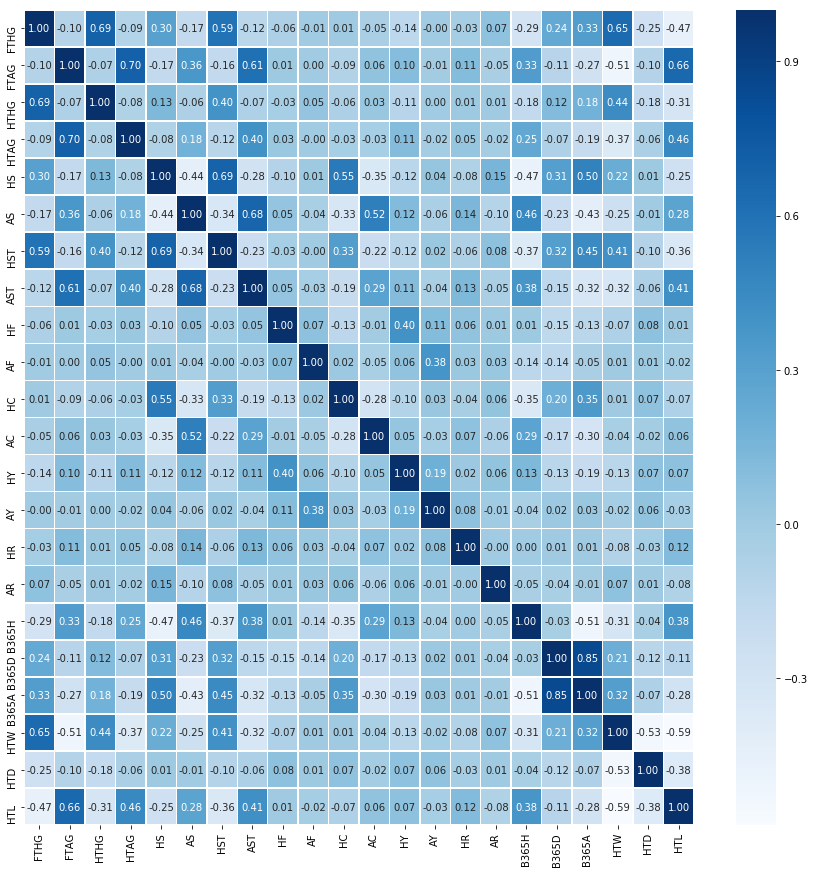

In [3]:
matchDf = df[['FTHG', 'FTAG', 'HTHG',
       'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A','HTW','HTD','HTL']]
plt.figure(figsize = (15,15))
sns.heatmap(data = matchDf.corr(), annot=True,fmt='.2f',linewidths=.5, cmap='Blues')

피어슨 상관 계수의 절대값이 약 0.3 이상이라면 유의미한 상관성을 지니고 있다.  
(https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98)
그런 의미에서 경기결과(HTW, HTD, HTL)와 유의미한 지표는 다음과 같았다.  
- 골 관련 데이터: FTHG, FTAG, HTHG, HTAG
- 슈팅 관련 데이터: HS, AS, HST, AST
- 배당률 데이터: B365H, B365D, B365A

골 관련 데이터는 골 수 자체가 이미 결과를 결정시키는 결과론적인 데이터이므로 제외하자.  
그렇다면, 의미있는 데이터는 다음과 같다.
- 배당률 데이터
- 슈팅 관련 데이터

## 배당률 데이터 분석

축구를 즐기는 방법에는 경기적 요소 이외에도 베팅이라는 요소도 있다.  
그 중 가장 대표적인 베팅 방식이 바로 1x2 베팅인데, 경기 결과(승/무/패) 중 하나를 예측 하는 것이다.  
예측과 함께 돈이 걸리면 경기 결과를 맞췄을 때 결과마다 걸렸던 돈의 비율에 따라 재분배하는 방식이다.  
베팅에 참여하는 축구 팬들은 해당 경기와 리그에 대한 좋은 이해력과 연구를 바탕으로 나름의 최선의 판단을 내릴 것이다.  
이러한 판단들이 집단을 형성하면 의미 있는 지표가 될 것이라고 추측하고 확인해보자.

배당률은 해당 결과를 예측했을때, 예측에 성공할 경우 몇 배로 돈을 받을지를 수치화 한 것이다.  
해당 결과가 유력할수록 사람들은 그에 돈을 많이 걸고 그만큼 돈은 적게 받을 것이다.  
반대로 가능성이 없는 결과일수록 위험부담이 커지는 대신, 성공할 경우 돈을 많이 받을 것이다.  

즉, **배당률이 낮을수록 해당 결과가 맞을 가능성이 크다**고 예측할 수 있다.

In [4]:
B365_odds = ['B365H', 'B365D', 'B365A']
BW_odds = ['BWH', 'BWD', 'BWA']
df[['FTR']+B365_odds + BW_odds].head()

,FTR,B365H,B365D,B365A,BWH,BWD,BWA
0,A,2.00,3.6,4.00,2.00,3.30,3.70
1,D,1.36,5.0,11.00,1.40,4.75,9.00
2,D,1.70,3.9,5.50,1.70,3.50,5.00
3,H,1.95,3.5,4.33,2.00,3.30,3.75
4,H,1.65,4.0,6.00,1.65,4.00,5.50


배당률만 보고 예측한 결과가 실제 경기 결과와 맞는지 확인해 봤다.  
실제로 배당률이 가장 작은 결과를 선택하면 어느정도 실제 경기 결과와 일치하는 것을 알 수 있다.

In [5]:
bookmakers = ['B365', 'IW', 'LB', 'PS', 'WH', 'VC']    # BW 는 918 행에 NaN이 들어가서 삭제했다.
results = ['H', 'D', 'A']

for bookmaker in bookmakers:
    cases = [bookmaker+result for result in results]
    guess = df[cases].idxmin(axis=1).map(lambda x: x[-1])
    df[bookmaker] = (df['FTR']==guess)
    
hit_rate = df[bookmakers].apply(pd.value_counts)
hit_rate.loc['Hit rate'] = hit_rate.loc[True] / hit_rate.sum()
hit_rate

,B365,IW,LB,PS,WH,VC
True,622.000000,624.000000,623.000000,621.000000,619.000000,621.000000
False,518.000000,516.000000,517.000000,519.000000,521.000000,519.000000
Hit rate,0.545614,0.547368,0.546491,0.544737,0.542982,0.544737


배당률만 가지고 결과를 예측했을때, 아무 근거없이 한 예측인 33%보다 훨씬 높은 약 54%의 예측 성공률을 보여준다.  
즉, **배당률은 결과 예측에 의미 있는 지표**이다.  
북메이커 별로 예측 성공률을 계산해보니 **북메이커간에는 큰 차이가 없다.**  
앞으로 배당률을 살펴볼때는 **B365**의 배당률만 살펴봐도 충분하다.  

## 슈팅 관련 데이터 분석

슈팅은 축구 경기에서 일반적으로 득점하는 방법이다. 일반적으로 발이나 머리를 사용한다.  
유효슈팅은 그 중에서도 골문 안으로 향하는 슈팅을 뜻한다. 득점과 직접적으로 연결된다.  
따라서 슈팅에 대한 이해는 득점과 승리로 이어질 것이다.  

우선 중간을 기점으로 상위팀과 하위팀의 슈팅 분포에 대해 살펴보았다. 정확도와 슈팅 횟수로 나눠서 살펴보았다.

In [6]:
s1 = df[['HomeTeam','HS','HST','HTW','HTD','HTL']]
s1.columns = ['Team', 'S', 'ST', 'W', 'D', 'L']
s2 = df[['AwayTeam','AS','AST','HTL','HTD','HTW']]
s2.columns = ['Team', 'S', 'ST', 'W', 'D', 'L']

gameDf = pd.concat([s1,s2],ignore_index=True)
group = gameDf.groupby(gameDf['Team'])
teamDf = group.mean()
teamDf["SAcc"] = teamDf['ST'] / teamDf['S']

mid = teamDf['W'].quantile(0.5)
teamDf['Strong'] = teamDf['W'] >= mid

# 홈팀 기준
group = df[['HomeTeam','HS','HST','HTW','HTD','HTL']].groupby(df['HomeTeam'])
teamDfHome = group.mean()
teamDfHome["HSAcc"] = teamDfHome['HST'] / teamDfHome['HS']

mid = teamDfHome['HTW'].quantile(0.5)
teamDfHome["Strong"] = teamDfHome['HTW'] >= mid

# 어웨이팀 기준
group = df[['AwayTeam','AS','AST','HTW','HTD','HTL']].groupby(df['AwayTeam'])
teamDfAway = group.mean()
teamDfAway.columns = ['AS','AST','ATL','ATD','ATW']
teamDfAway = teamDfAway[['AS','AST','ATW','ATD','ATL']]
teamDfAway["ASAcc"] = teamDfAway['AST'] / teamDfAway['AS']

mid = teamDfAway['ATW'].quantile(0.5)
teamDfAway["Strong"] = teamDfAway['ATW'] >= mid

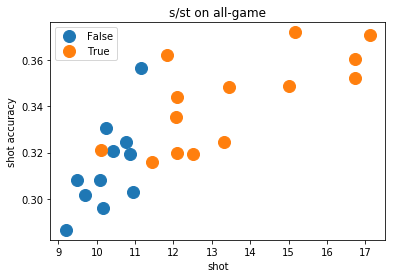

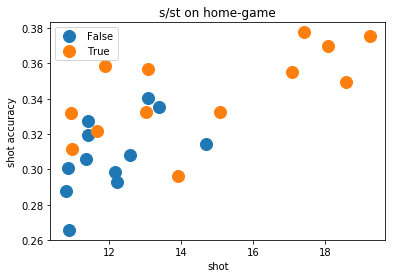

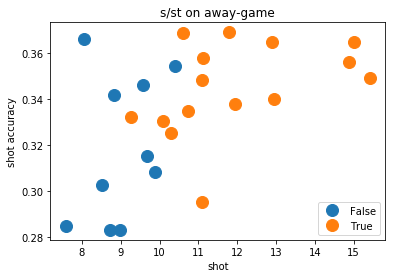

In [7]:
groups = teamDf.groupby('Strong')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.S, group.SAcc, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.title("s/st on all-game")
plt.ylabel('shot accuracy')
plt.xlabel('shot')
plt.show()

groups = teamDfHome.groupby('Strong')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.HS, group.HSAcc, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.title("s/st on home-game")
plt.ylabel('shot accuracy')
plt.xlabel('shot')
plt.show()

groups = teamDfAway.groupby('Strong')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.AS, group.ASAcc, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.title("s/st on away-game")
plt.ylabel('shot accuracy')
plt.xlabel('shot')
plt.show()

주황색 군이 상위 팀이고, 파란색 군이 하위 팀이다.  
홈, 어웨이, 전체 경우에서 모두 분석을 해봤다.  
약간의 차이는 있지만 대체로 비슷한 경향을 보인다.  
슈팅과 유효슈팅이 높을수록 강팀이 분포하고, 반대의 경우는 약팀이 분포한다.  
이렇게 **슈팅과 유효슈팅도 경기 결과에 의미있는 지표**임을 확인했다.

또한 이를 바탕으로 여러가지 재밌는 추론을 할 수도 있다.  

대체로 슈팅 수가 많을수록 상위 팀에 속할 확률이 높은건 명확하다.  
반대로 슛 정확도만으로는 상, 하위팀을 명확하게 구분하기 힘들었다.  
즉 **슈팅 수**가 1차적 요인이고, **슛 정확도**는 2차적 요인이다.  
따라서 다음과 같은 추론이 가능하다.
> 정확도를 떠나서 슈팅을 많이 하면 순위가 오르기 쉽다.  
> 따라서 정확한 슈팅을 하려는 것보다 일단 슈팅을 많이 시도하는 것이 낫다.

추가적으로 홈과 어웨이에 대해서도 분석해보자.

홈에서 경기를 할때는 어웨이에서 경기를 할때에 비해서, 슈팅 횟수가 적어도 슛 정확도가 높은 경향을 보인다.  
그래서 다음과 같은 추측을 할 수 있다.
> 홈에서 경기할 때는 홈 어드밴티지 덕분에 슛을 여러번 시도하지 않더라도 슛 정확도가 높은 편이다.

홈 어드밴티지는 홈 경기에서의 축적된 연습량에서 오는 익숙함, 관중의 응원 등을 포함한다.  
이러한 외적인 요소들도 슛 정확도를 높여주기 때문에 홈 팀이 승리할 확률에 기여한다고 볼 수 있다.  
실제로 승률 분포를 살펴보면 모든 팀들은 홈에서 승률이 높다.


# STEP 3. 분석 모델 적용
# 로지스틱 회귀분석(Logistic Regression)


지금 우리는 승, 무, 패 3가지 경우의 확률을 각각 예측하고 그 중 가장 높은 확률의 선택을 하고 싶다.  
결국 [0,1]의 확률값을 얻어서 분류하는 것이 목적이므로 선형 회귀 모델보다는 로지스틱 회귀 모델이 더 적합해보인다.  


## 모델 학습

In [8]:
hdata = df[['HTW','HS','HST','AS','AST','B365H','B365D','B365A']]
ddata = df[['HTD','HS','HST','AS','AST','B365H','B365D','B365A']]
adata = df[['HTL','HS','HST','AS','AST','B365H','B365D','B365A']]

hdata['intercept'] = 1.0
ddata['intercept'] = 1.0
adata['intercept'] = 1.0
 
# logistic regression
train_cols_h = hdata.columns[1:]
logit_h = sm.Logit(hdata['HTW'], hdata[train_cols_h])
train_cols_d = ddata.columns[1:]
logit_d = sm.Logit(ddata['HTD'], ddata[train_cols_d])
train_cols_a = adata.columns[1:]
logit_a = sm.Logit(adata['HTL'], adata[train_cols_a])

# fit the model
hresult = logit_h.fit()
dresult = logit_d.fit()
aresult = logit_a.fit()

logistic_coef = pd.DataFrame(data=[hresult.params.values,dresult.params.values,aresult.params.values],index = ['Home','Draw','Away'],columns = hdata.columns[1:])

logistic_coef

Optimization terminated successfully.
         Current function value: 0.524369
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545136
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.434386
         Iterations 7


,HS,HST,AS,AST,B365H,B365D,B365A,intercept
Home,-0.129465,0.453610,0.051579,-0.330744,-0.385990,0.427532,-0.059095,-0.236626
Draw,0.066037,-0.163557,0.030677,-0.110274,0.003515,-0.350868,0.035640,0.059689
Away,0.078280,-0.421624,-0.094367,0.496899,0.275811,-0.103827,-0.048156,-1.406243


슈팅 관련 데이터(HS:AST)와 배당률 데이터(B365H:A)로 분석한 결과를 해석하면 다음과 같다.

>- 홈 팀이 이길 확률   
= -0.236626 - 0.129465* HS + 0.453610* HST + 0.051579* AS - 0.330744* AST - 0.385990* B365H + 0.427532* B365D - 0.059095* B365A  
>- 무승부일 확률   
= 0.059689 + 0.066037* HS - 0.163557* HST + 0.030677* AS - 0.110274* AST	+ 0.003515* B365H - 0.350868* B365D	+ 0.035640* B365A  
>- 어웨이 팀이 이길 확률   
= -1.406243 + 0.078280* HS - 0.421624* HST - 0.094367* AS + 0.496899* AST + 0.275811* B365H - 0.103827* B365D - 0.048156* B365A

식이 중요하다기 보다는 가중치에 주목해 보자.  
홈 팀이 이길 확률에서는 HS, HST, AST B365H, B365D의 가중치 계수의 절댓값이 크므로 해당 지표의 영향력을 확인할 수 있다.  
또한 어웨이 팀이 이길 확률도 정반대의 양상을 띠며 위에서 예측했던대로 임을 알 수 있다.
반면에 무승부일 확률은 B365D 이외에는 두드러지는 계수가 없고 대체로 홈과 어웨이에 따라 대칭성을 띤다.  


## 학습 테스트
학습 데이터로 학습한 확률로 다시 학습 데이터에 적용해서 학습이 잘 됐는지 확인해보자.

학습에 사용했던 데이터를 재활용하면 자연스럽게 예측이 성공할 확률이 높다.  
하지만 축구 경기에는 굉장히 다양하고 복잡한 변수가 있기 때문에 현실적으로는 정확하게 예측하기가 불가능에 가깝다.  
그래도 가지고 있는 데이터가 적음에도 불구하고 꽤 괜찮은 성공률을 보인다.

In [9]:
hdata["predict"] = hresult.predict(hdata[train_cols_h])
ddata["predict"] = dresult.predict(ddata[train_cols_d])
adata["predict"] = aresult.predict(adata[train_cols_a])

logistic_predict = df[['FTR','HS','HST','AS','AST','IWH','IWD','IWA']]
logistic_predict['pHTH'] = hdata["predict"]
logistic_predict['pHTD'] = ddata["predict"]
logistic_predict['pHTA'] = adata["predict"]

logistic_predict

cases = ['pHTH','pHTD','pHTA']
guess = logistic_predict[cases].idxmax(axis=1).map(lambda x: x[-1])
guess

logistic_predict['pHT'] = (df['FTR']==guess).astype(int)

logistic_predict['pHT'].mean()

0.612280701754386

테스트 결과 약 61% 정도의 적중률을 보인다.  

학습했던 데이터로 다시 테스트를 했음에도 61%가 나온 것은 일반적인 분석에 비해 부족한 수치일 수 있다.  
그만큼 축구 경기의 결과가 단순히 몇 가지의 수치 데이터 정도로 예측하기는 힘들다는 것을 알 수 있다.  

하지만 여전히 삼중택일의 확률인 33%에 비해 61%는 탁월하게 향상된 수치다.  


## 실제 테스트
실제 경기를 예측할 때는 학습할 때와 차이가 있다.  
경기가 시작하지 않았기 때문에, 경기가 치뤄지기 이전의 정보만을 알 수 있다.  
즉, 슈팅에 관한 데이터를 미리 알 수가 없다.  
그렇기 때문에 슈팅에 관한 데이터는 과거 데이터의 기록을 통해 예측값을 만들어서 적용시키도록 하자.  

재미를 위해서 기존에 있던 데이터가 아닌 적용 가능한 다른 데이터를 찾아 보았다.  
영국에는 EPL을 포함한 영국의 모든 프로팀이 참가하는 EFL 컵이 있다. 이 경기 결과를 예측 할 수 있을까?  
EFL컵 16강 이후, 15-18 시즌 동안의 자료가 있는 팀들이 치룬 총 11경기를 대상으로 모델을 검증해보았다.  
(데이터 출처 : http://www.wincomparator.com/en-gb/results/soccer/england/efl-cup-268/)  
(가공된 데이터 : https://raw.githubusercontent.com/sunghoonhong/football-analysis/master/eflresult.csv)  

슈팅수는 미리 알 수 없기 때문에, 임의로 EPL 15~18 시즌의 평균을 대입하기로 했다.


In [10]:
hs_dict = teamDfHome['HS'].T.to_dict()
hst_dict = teamDfHome['HST'].T.to_dict()
as_dict = teamDfAway['AS'].T.to_dict()
ast_dict = teamDfAway['AST'].T.to_dict()

efldf['HS'] = efldf['HomeTeam'].map(hs_dict)
efldf['HST'] = efldf['HomeTeam'].map(hst_dict)
efldf['AS'] = efldf['AwayTeam'].map(as_dict)
efldf['AST'] = efldf['AwayTeam'].map(ast_dict)
efldf['intercept'] = 1.0

efldf["pHTH"] = hresult.predict(efldf[train_cols_h])
efldf["pHTD"] = dresult.predict(efldf[train_cols_d])
efldf["pHTA"] = aresult.predict(efldf[train_cols_a])

cases = ['pHTH','pHTD','pHTA']
guess = efldf[cases].idxmax(axis=1).map(lambda x: x[-1])
guess

efldf['pHT'] = (efldf['FTR']==guess).astype(int)
efldf

,HomeTeam,AwayTeam,B365H,B365D,B365A,FTR,HS,HST,AS,AST,intercept,pHTH,pHTD,pHTA,pHT
0,Man City,Arsenal,1.57,4.59,5.75,H,18.070175,6.684211,12.894737,4.701754,1.0,0.641652,0.203722,0.118063,1
1,Arsenal,Chelsea,2.70,3.39,2.79,H,17.421053,6.578947,12.947368,4.403509,1.0,0.486479,0.262151,0.169145,1
2,Chelsea,Arsenal,1.53,4.50,6.50,D,17.087719,6.070175,12.894737,4.701754,1.0,0.589970,0.219347,0.133921,0
3,Chelsea,Bournemouth,1.25,6.75,13.00,H,17.087719,6.070175,10.736842,3.596491,1.0,0.786507,0.145223,0.055402,1
4,Arsenal,West Ham,1.50,4.20,6.00,H,17.421053,6.578947,11.087719,3.859649,1.0,0.656932,0.230425,0.094824,1
5,Leicester,Man City,5.75,4.33,1.60,D,13.035088,4.333333,15.421053,5.385965,1.0,0.196657,0.205686,0.516856,0
6,Tottenham,West Ham,1.39,5.25,8.00,A,19.245614,7.228070,11.087719,3.859649,1.0,0.746695,0.184055,0.067696,0
7,Chelsea,Everton,1.72,3.79,5.50,H,17.087719,6.070175,10.614035,3.912281,1.0,0.547240,0.261490,0.133598,1
8,Bournemouth,Middlesbrough,1.85,3.60,4.75,H,13.385965,4.491228,7.578947,2.157895,1.0,0.571791,0.292412,0.120553,1
9,Arsenal,Norwich,1.36,5.75,8.50,H,17.421053,6.578947,9.684211,3.052632,1.0,0.804263,0.165866,0.054961,1


배당률만을 보고 예측했을 때와 비슷한 적중률을 보인다.  
주목해야할 점은 1번 행에 있는 아스날-첼시 전이다.  
홈승과 어웨이승의 배당률이 비슷한 경우(2.70 : 2.79)였으나 모델이 예측한 승,패 확률은 3배 가까이 차이난다.(49% : 17%)  
이런 점에서 단순히 배당률에만 의존하여 예측하는 것보다 좋은 예측을 했다고 볼 수 있다.  

In [11]:
efldf['pHT'].mean()

0.7272727272727273

11개의 경기 결과 예측 중 무려 72%의 예측 성공률을 보여준다.  
분석이 없었다면 33%에 그쳤을 확률을 2배 이상이나 올렸기에 충분히 성공적이라고 판단하며 테스트를 마친다.

# STEP 4. 결론

처음에는 단순히 데이터 분석을 이용하면 축구 경기 결과 예측을 잘 할 수 있을까? 라는 의문에서 시작했다.  
> 결론부터 말하자면 "그렇다"

아무런 데이터 없이 소위 말하는 '찍기'를 한다면 1/3 확률에서 출발한다.  

배당률, 홈, 어웨이, 슈팅 횟수, 유효 슈팅 횟수 등의 데이터들을 활용하면 약 70%에 달하는 높은 확률을 얻을 수 있다.  

활용한 데이터를 크게 분류하자면 결국 **배당률** 과 **슈팅** 이다.  
**슈팅**은 분명히 매력적인 데이터지만 실제 경기에서는 변수가 워낙 많아서 그것만으로 예측하기엔 무리가 있다.  
**배당률**은 그 자체만으로도 어느정도 예측이 들어맞을 정도로 신뢰도가 높기는 하지만, 배당률도 완전치 않다.  
나름의 분석을 통한 판단 하에 베팅하는 사람도 있지만, 단순히 재미나 팬심으로 베팅하는 *허수도 포함하기 때문이다*.  

이런 상황에서 실제 경기를 대입해보고 ***경기 데이터를 활용하면 배당률의 단점을 보완하여 예측할 수 있음***을 보였다.  
이번 분석에서는 데이터가 다양하지 않았지만, 충분히 다양한 데이터를 확보한다면 그 데이터로 모델을 더 개선시킬 수 있을 것이다.  
>***"확장가능성"***

이를 보인 것으로 이번 데이터 분석은 충분히 의미있었다고 결론을 내린다.  


## 한계점
#### 축구 리그 시스템의 한계
축구 리그는 선수, 감독, 팀 모두가 변수다.  
선수도 계속적인 계약을 통해 이적이 잦고, 감독도 약 2년 정도면 교체된다.  
또한 팀이 리그에 고정되지 않고 강등/승강되어 고정된 비교를 하기 힘들다.  
그렇기 때문에 아무리 많은 데이터를 축적시킨다고 해도 시간이 지날수록 신뢰성이 사라질 뿐이다.

#### 데이터의 다양성 부족
이번 분석에서 실제로 이용할 수 있었던 데이터는 배당률, 슈팅 관련 데이터, 홈/어웨이 정도였다.  
하지만 축구 경기는 훨씬 더 다양하고 많은 변수가 개입한다.  
예를 들어, 선수 개인의 능력이나 환경, 감독의 실험적인 전략 선택, 실제 경기 중의 상호작용, 경기 당일의 날씨 등 굉장히 고려할 수 있는 요소가 많다.  
실제로 더운 지역에서 활동하던 팀이 원정을 갔는데 경기 당일 눈이 내려서 완패하는 경기도 있었다.  
이렇듯 실제로 경기에 영향을 크게 줄 수 있는 요소도 직접 데이터를 수집할 수 없는 상황이기 때문에 지금의 우리에겐 능력 밖이다. 


## 보충 과제
이번에 사용한 모델은 '**이항 로지스틱 회귀분석 모델**'이었다.  
이항 로지스틱 회귀분석 모델은 두가지의 결과만을 예측하는 모델이다.  
그러나 우리가 얻고 싶은 모델은 승/무/패 3가지 결과 중의 하나를 분류해내야 한다.  
그래서 홈 팀을 기준으로 홈 팀의 승/무/패 확률을 3가지의 모델로 각각 구하는 방식으로 구현했다.  
이렇게해도 괜찮은 결과를 보여주기는 했지만, 몇가지 문제점을 발견했다.
- 3개 모델의 예측값의 합이 1이 아닐 수 있다.
- 3개의 결과를 동시에 고려하지 못하기 때문에, 설계 시 더 좋은 지표를 설정하지 못했다.

그래서 생각해볼만한 해결책은 '**다중 로지스틱 회귀분석 모델**'이다.  
다중 로지스틱 회귀분석 모델은 이항 로지스틱 회귀분석 모델과 기본적으로 기능은 유사하다.  
다만 모델이 분류하는 대상이 3개 이상일때 사용할 수 있는 모델이다.  
다중 로지스틱 회귀분석 모델을 적용해보면 지금보다 더 좋은 모델로서 기능할 것이라고 추측한다.
